Music is a passion I cannot live without; it motivates me, and let's me get through the day. I feel as it is an indenspensable resource for the soul, and serves as a medicine for the hardships in life. Anways, I also love spotify. Spotify is a service I use all the time, and I've noticed that I often listen to German Music. That got me thinking; just how different is the music in germany and the U.S? 

To perform this task I looked at the top10 songs for the U.S and Germany from 2017 onwards using the Spotipy, a library that allows me to extract music features. The features I will be looking at are danceability, energy, key, loudness, mode, speechines, acousticness, instrumentalness, liveliness, valence and tempo.

Scraping the Data:

In [16]:
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials
cid = "58ff3ad8fc2446669ee16d1a75185ba8"
secret = "85504b94651641a7ad56602bfac5eab9"
client_credentials_managerMan = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_managerMan)

In [3]:
#chart I am using
spotifySongs = pd.read_csv("charts.csv")
SpotifyDataSong = pd.DataFrame(spotifySongs)

#getting rid of repeats
newEntry_df = spotifySongs[spotifySongs["trend"] == "NEW_ENTRY"]
#getting songs in the US region
america_df = newEntry_df[spotifySongs["region"] == "United States"]
#getting songs in German Region
german_df = newEntry_df[spotifySongs["region"] == "Germany"]
#making sure that songs are rank 10 or less
america_df = america_df[america_df["rank"] <= 10]
german_df = german_df[german_df["rank"] <= 10]
spotifySongs = spotifySongs[spotifySongs["trend"] == "NEW_ENTRY"]


/tmp/ipykernel_1728/3452759185.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  america_df = newEntry_df[spotifySongs["region"] == "United States"]
/tmp/ipykernel_1728/3452759185.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  german_df = newEntry_df[spotifySongs["region"] == "Germany"]


In [6]:
#getting the top 200 songs; the data set also includes top50, and I want as much data as possible so I am going with top200
america_df = america_df[america_df["chart"] == "top200"]
germany_df = german_df[german_df["chart"] == "top200"]


In [7]:
#getting the data
def getData(region_df):
    #initializing data frame with url
    element = region_df.head(1)["url"]
    firstTrack = sp.audio_features(element)
    #sp.audio_features returns an array of 1 element
    print(firstTrack[0].keys())
    df = pd.DataFrame(columns = firstTrack[0].keys())

    for index,element in region_df.iterrows():
        url = element["url"]
        rank = element["rank"]
        region = element["region"]
        chart = element["chart"]
        trend = element["trend"]
        streams = element["streams"]
        artist =  element["artist"]
        title =  element["title"]
        date =  element["date"]
        mytrack = sp.audio_features(url)[0]
        df2 = pd.DataFrame(mytrack, index=[0])

        #pd.concat([element, df2])
        #df.concat(e
        df2["rank"] = rank
        df2["artist"] = artist
        df2["title"] = title
        df2["date"] = date
        df2["chart"] = chart
        df2["trend"] = trend
        df2["streams"] = streams
        df2["region"] = region
        df = df.append(df2, ignore_index = True)
        
    return df

In [8]:
#since my dataset does not have the genre for the uri, I 
#took the liberty of collecting the data
def get_genre(df):
    
    for index,element in df.iterrows():
        #url = element["url"]
        artistName = element["artist"]
        result = sp.search(artistName)
        track = result['tracks']['items'][0]
        artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
    
        if (artist["genres"]):
            genre = artist["genres"][0]
            if (len(genre) >=3):
                if ("pop" in genre):
                    genre = "pop"
                elif ("rock" in genre):
                    genre = "rock"
                elif ("rap" in genre):
                    genre = "rap"  
                elif ("metal" in genre):
                    genre = "rap"  
                elif ("country" in genre):
                    genre = "rap"  
                elif ("rap" in genre):
                    genre = "rap"  
                elif ("electronic" in genre):
                    genre = "electronic"  
                elif ("hop" in genre):   
                    genre = "hip hop"
            df.iloc[index, df.columns.get_loc('genre')] = genre

In [ ]:
#getting the data
america_df_final= getData(america_df)
germany_df_final = getData(german_df)


In [22]:
america_df_final["genre"] = np.nan
america_df_final.reset_index(drop = True, inplace = True)
germany_df_final["genre"] = np.nan
germany_df_final.reset_index(drop = True, inplace = True)
get_genre(germany_df_final)
get_genre(america_df_final)

In [23]:
america_df_final = america_df_final.sample(500)
germany_df_final = germany_df_final.sample(500)
germany_df_final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,rank,artist,title,date,chart,trend,streams,region,genre
234,0.838,0.66,7,-5.61,0,0.155,0.284,0,0.0898,0.364,...,4,7.0,"Nimo, Capo",Leyla,2019-02-15,top200,NEW_ENTRY,455936.0,Germany,hip hop
203,0.721,0.647,11,-7.039,1,0.189,0.0513,0.0026,0.2,0.56,...,4,7.0,RIN,Fabergé,2019-09-27,top200,NEW_ENTRY,838736.0,Germany,rap
170,0.821,0.767,0,-4.934,0,0.275,0.105,0.00434,0.117,0.698,...,4,3.0,RIN,Vintage,2019-05-24,top200,NEW_ENTRY,815384.0,Germany,rap
191,0.557,0.722,3,-7.832,0,0.307,0.279,0.000011,0.117,0.231,...,4,2.0,"Gzuz, Bonez MC, Maxwell, Ufo361",Über Nacht,2018-05-18,top200,NEW_ENTRY,544711.0,Germany,hip hop
414,0.844,0.784,2,-6.218,0,0.0346,0.47,0,0.245,0.95,...,4,6.0,RAF Camora,Puta Madre,2019-10-11,top200,NEW_ENTRY,611975.0,Germany,hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.819,0.835,8,-4.899,0,0.102,0.398,0.00674,0.252,0.703,...,4,1.0,"RAF Camora, Bonez MC",Blaues Licht,2021-07-23,top200,NEW_ENTRY,960910.0,Germany,rap
361,0.645,0.741,5,-4.989,0,0.0339,0.0323,0,0.29,0.534,...,4,10.0,Axwell /\ Ingrosso,More Than You Know,2017-06-30,top200,NEW_ENTRY,282510.0,Germany,pop
308,0.831,0.601,4,-7.49,0,0.0599,0.361,0.00002,0.0915,0.198,...,4,4.0,Capo,Run Run Run,2019-08-02,top200,NEW_ENTRY,470817.0,Germany,hip hop
98,0.71,0.576,10,-7.321,0,0.532,0.0672,0,0.118,0.61,...,4,2.0,Shirin David,Schlechtes Vorbild,2021-11-12,top200,NEW_ENTRY,517147.0,Germany,rap


In [24]:
compression_opts = dict(method='zip',
                        archive_name='german_gen.csv')  
germany_df_final.to_csv('german.zip', index=False,
          compression=compression_opts)  

compression_opts2 = dict(method='zip',
                        archive_name='america_gen.csv') 

america_df_final.to_csv('america.zip', index=False,
          compression=compression_opts2)  

In [44]:
combined = germany_df_final.append(america_df_final)

/tmp/ipykernel_1975/3564189028.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = german_df_final.append(america_df_final)


In [45]:
compression_opts3 = dict(method='zip',
                        archive_name='combined.csv')  
combined.to_csv('combined.zip', index=False,   compression=compression_opts) 

Here, I will be plotting the features of the songs, to see if the popularity of a song is affected by particular features. Since we are looking at the top 10 songs, technically all of these songs are popular, but there is still variablity in the top 10.

In [25]:
#normalize the data for the scatter plot
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [26]:
#9 lines
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np
import seaborn as sns
x_array = np.array([2,3,5,6,7,4,8,7,6])
normalized_arr = preprocessing.normalize([x_array])
import statsmodels.formula.api as sm

#plot the data
def plot(df, name, p1):
    #here I put a "rank2" so the higher values will be on the right for the scatter plot
    df["rank2"] = df["rank"] * -1 + 10
    #print(df [df["rank2"] < 2])
    standardized = NormalizeData(df["rank2"]).values
    standardized = df["rank2"].values
    Y = np.asarray(standardized).reshape(-1,1)
    if (p1 == "danceability"):
        X = np.array(df["danceability"].values).reshape(-1,1)
    elif (p1 == "energy"):
        X = np.array(df["energy"].values).reshape(-1,1)  
    elif (p1 == "loudness"):
        X = np.array(df["loudness"].values).reshape(-1,1)  
            
    elif (p1 == "instrumentalness"):
        X = np.array(df["loudness"].values).reshape(-1,1)  
    elif (p1 == "speechiness"):
        X = np.array(df["speechiness"].values).reshape(-1,1)      
    elif (p1 == "acousticness"):
        X = np.array(df["acousticness"].values).reshape(-1,1)  
    elif (p1 == "valence"):
        X = np.array(df["valence"].values).reshape(-1,1)  
    elif (p1 == "tempo"):
        X = np.array(df["tempo"].values).reshape(-1,1)  
    
    elif (p1 == "liveness"):
        X = np.array(df["liveness"].values).reshape(-1,1)      
    else:
        X = np.array(df["danceability"].values).reshape(-1,1)
    
    plt.scatter(Y,X)
    #plt.plot(X, model.predict(X), color = "red")
    plt.title(name)
    plt.show()

   

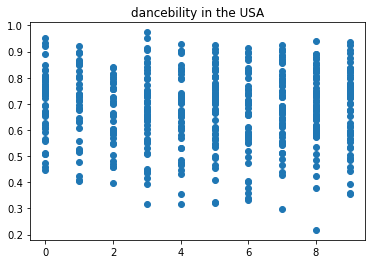

<AxesSubplot:xlabel='rank', ylabel='danceability'>

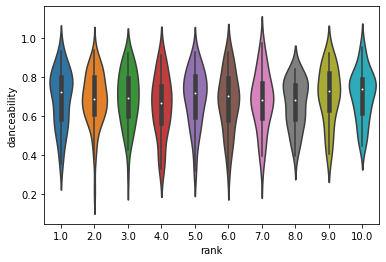

In [27]:
germany_df_final = pd.read_csv("german_gen.csv")
america_df_final = pd.read_csv("america_gen.csv")

plot(america_df_final, "dancebility in the USA","danceability")
america_df_copy = america_df_final.copy()
sns.violinplot(x= "rank", y = "danceability", data = america_df_final)

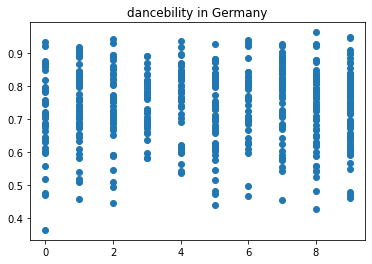

<AxesSubplot:xlabel='rank', ylabel='danceability'>

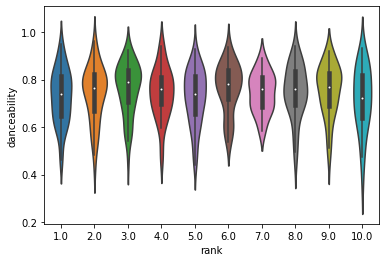

In [28]:
plot(germany_df_final, "dancebility in Germany","danceability")
sns.violinplot(x= "rank", y = "danceability", data = germany_df_final)

Overall, for the top 10 songs, it looks like german songs in the top 10 tend to have more varaibility in their danceability. This can be seen in how the danceability in the Germany has more outliers as a whole. For the US, the meandanceability seems to decrease with the ranks going down, bu in germany, this is not the case. In fact, the mean danceability seems to peak at rank = 5.

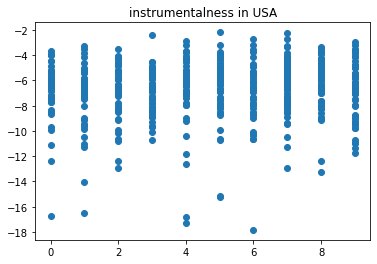

<AxesSubplot:xlabel='rank', ylabel='instrumentalness'>

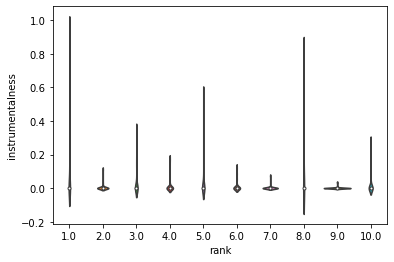

In [29]:
#comparing instrumentalness in Germany and America
plot(america_df_final, "instrumentalness in USA","instrumentalness")
sns.violinplot(x= "rank", y = "instrumentalness", data = america_df_final)



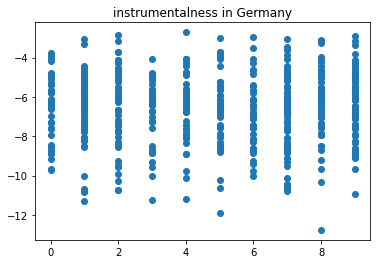

<AxesSubplot:xlabel='rank', ylabel='instrumentalness'>

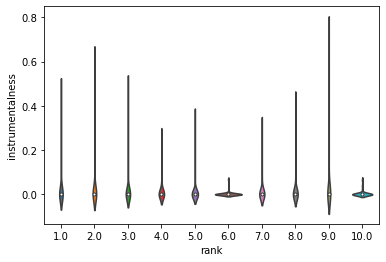

In [31]:
plot(germany_df_final, "instrumentalness in Germany","instrumentalness")
sns.violinplot(x= "rank", y = "instrumentalness", data = germany_df_final)



With regard to Instrumentlness, both the US and Germany are very similiar in their level of instrumentalness it the top 10, with instrumentalness having a very weak correation with the top 10.

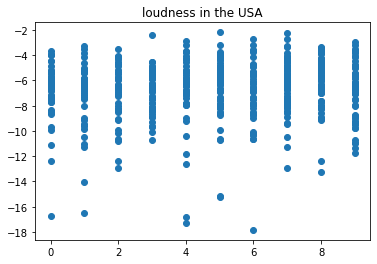

<AxesSubplot:xlabel='rank', ylabel='loudness'>

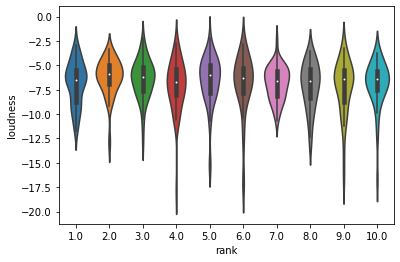

In [32]:
#comparing loudness in USA and Germany
plot(america_df_final, "loudness in the USA","loudness")
sns.violinplot(x= "rank", y = "loudness", data = america_df_final)



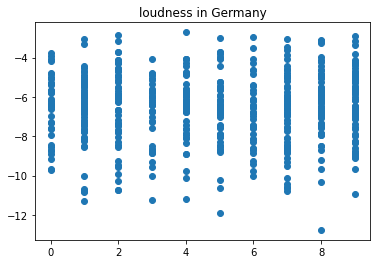

<AxesSubplot:xlabel='rank', ylabel='loudness'>

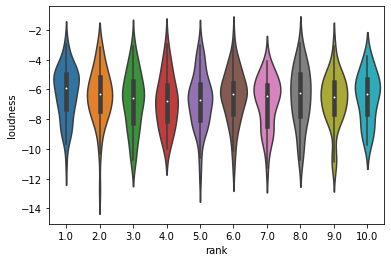

In [34]:
plot(germany_df_final, "loudness in Germany","loudness")
sns.violinplot(x= "rank", y = "loudness", data = germany_df_final)

Germans seem to have a bit more variabiltiy in the mean loudness for their top 10 songs than the U.S. They also have songs that are on the quieter side more likely to enter in the top 10 than the U.S, with loudness being more skewed in the U.S.

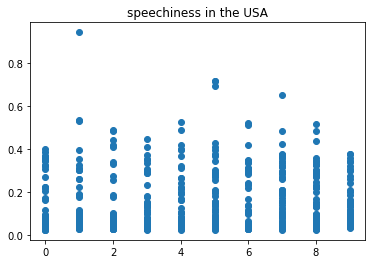

<AxesSubplot:xlabel='rank', ylabel='speechiness'>

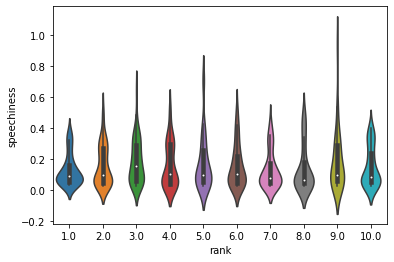

In [35]:
#comparing speechiness in USA and Germany
plot(america_df_final, "speechiness in the USA","speechiness")
sns.violinplot(x= "rank", y = "speechiness", data = america_df_final)



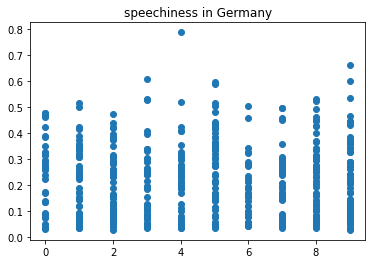

<AxesSubplot:xlabel='rank', ylabel='speechiness'>

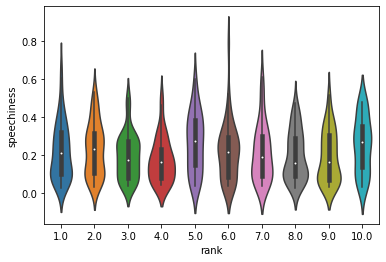

In [37]:

plot(germany_df_final, "speechiness in Germany","speechiness")
sns.violinplot(x= "rank", y = "speechiness", data = germany_df_final)

Now, taking a look at speechiness, which detects the precence of spoken words in a track, and the more speechlike the words, the higher the value. Something like a podcast would have a higher speechiness value, and usually songs have a lower speechiness value. Germany had a higher average level of speechiness; this is perhaps because of the dialect of the germans, where there voice does not change as much when they sing compared to America. Rap is a good example of a genre which leans towards higher speechiness values, depending on whether the voice is distorted or changed at all. So, overall it seems as though Germany enjoys more spoken words in their tracks. Overall, the US is much more skewed towards lower speechiness values.

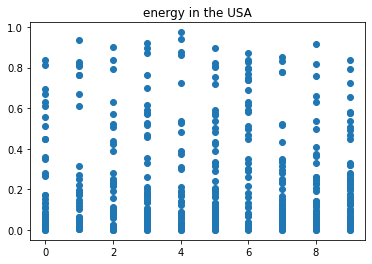

<AxesSubplot:xlabel='rank', ylabel='energy'>

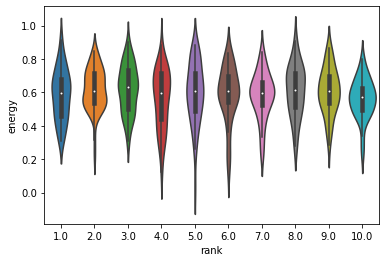

In [38]:
plot(america_df_final, "energy in the USA","acousticness")
sns.violinplot(x= "rank", y = "energy", data = america_df_final)


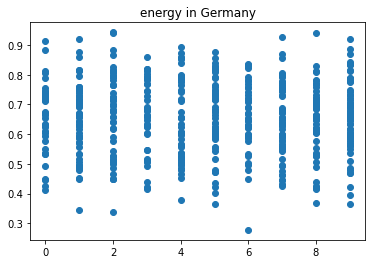

<AxesSubplot:xlabel='rank', ylabel='energy'>

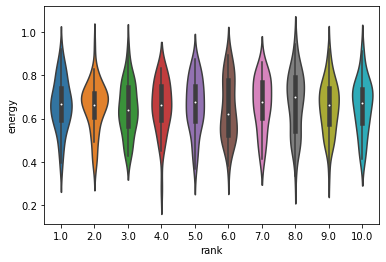

In [39]:
plot(germany_df_final, "energy in Germany","energy")
sns.violinplot(x= "rank", y = "energy", data = germany_df_final)


Based on the above data, it seems as though music in the top 10 for the US is much more in the middle ground of enery. The mean energy for each rank is roughly .6, with values skewed towards more higher energy songs. For the Germans, thier mean energy is higher than the US for each rank, but the data is less skewed; this means that it is more likely for a low energy song to be popular in Germany, even with the higher average.

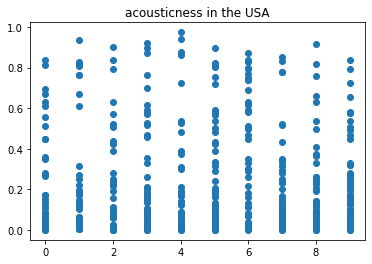

<AxesSubplot:xlabel='rank', ylabel='acousticness'>

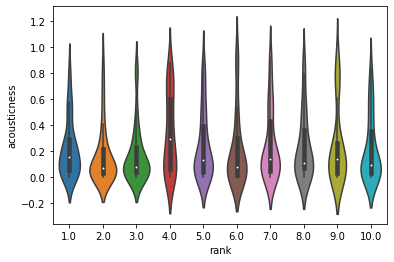

In [40]:
#comparing acousticness in USA and Germany
plot(america_df_final, "acousticness in the USA","acousticness")
sns.violinplot(x= "rank", y = "acousticness", data = america_df_final)

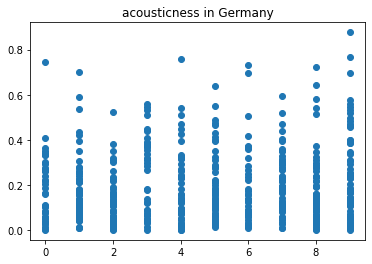

<AxesSubplot:xlabel='rank', ylabel='acousticness'>

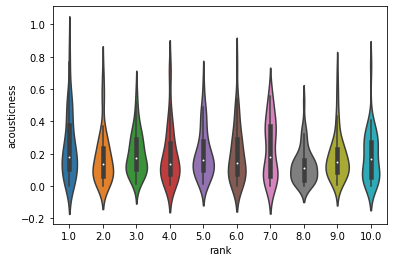

In [41]:
plot(germany_df_final, "acousticness in Germany","acousticness")
sns.violinplot(x= "rank", y = "acousticness", data = germany_df_final)

acousticness measures the electrical amplificaiton of a song. Comparing Germany and the US, we can see the US is slighty more variable with it's acoustiness, but not by much.Both data sets are skewed towards the bottom, with lower acousticness.

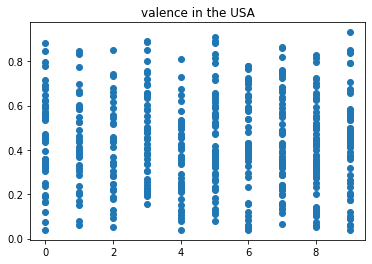

<AxesSubplot:xlabel='rank', ylabel='valence'>

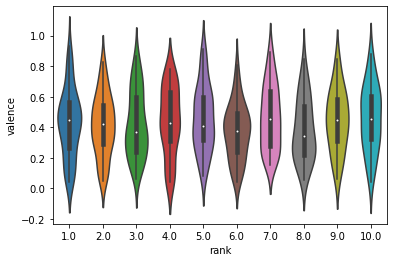

In [42]:
#comparing valence in USA and Germany
plot(america_df_final, "valence in the USA","valence")
sns.violinplot(x= "rank", y = "valence", data = america_df_final)



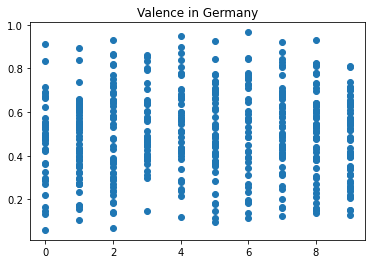

<AxesSubplot:xlabel='rank', ylabel='valence'>

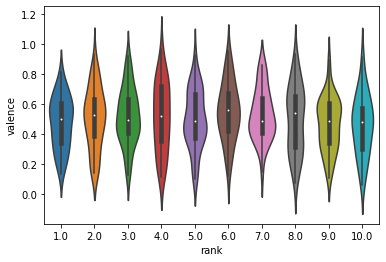

In [45]:
plot(germany_df_final, "Valence in Germany","valence")
sns.violinplot(x= "rank", y = "valence", data = germany_df_final)

Valence measures the musical postiveness conveyed by a track. Lower values mean less positivity. Based on the above data, it is clear that both the US and germany have pretty well distributed valence; songs tend to lean toward the middle, with less songs going to extremes. Overall, the US and Germany are quite similar here.


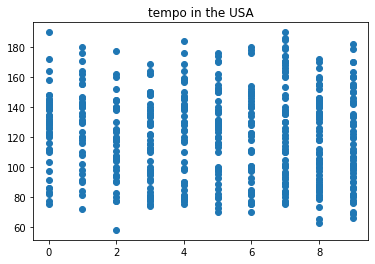

<AxesSubplot:xlabel='rank', ylabel='tempo'>

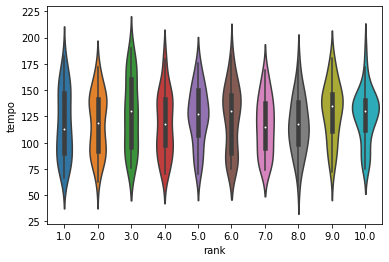

In [46]:
#comparing tempo
plot(america_df_final, "tempo in the USA","tempo")
sns.violinplot(x= "rank", y = "tempo", data = america_df_final)

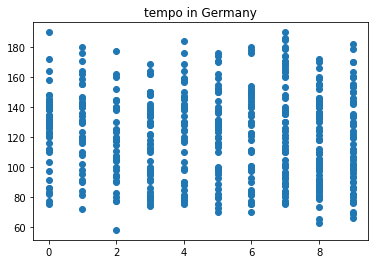

<AxesSubplot:xlabel='rank', ylabel='tempo'>

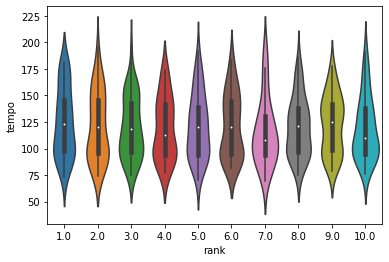

In [47]:
plot(america_df_final, "tempo in Germany","tempo")
sns.violinplot(x= "rank", y = "tempo", data = germany_df_final)

Tempo measures how fast or slow a song is performed; based on the above data, the US had most values concentrated towards the middle. For Germany, the situation is a bit different; for rank 5 7 and rank 10, the data was acutally skewed more towards the lower end. Overall, it seems as though Germans appreciate music with a lower tempo more than americans.

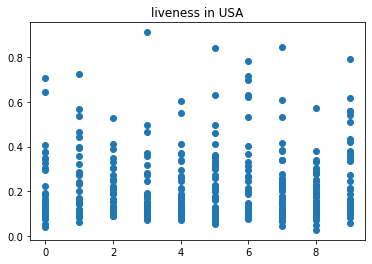

<AxesSubplot:xlabel='rank', ylabel='liveness'>

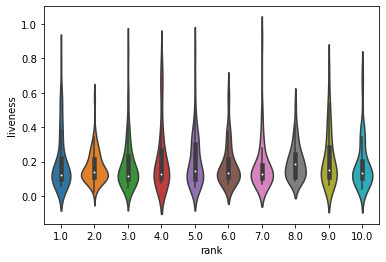

In [48]:
plot(america_df_final, "liveness in USA","liveness")
sns.violinplot(x= "rank", y = "liveness", data = america_df_final)

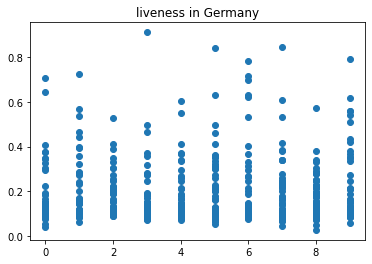

<AxesSubplot:xlabel='rank', ylabel='liveness'>

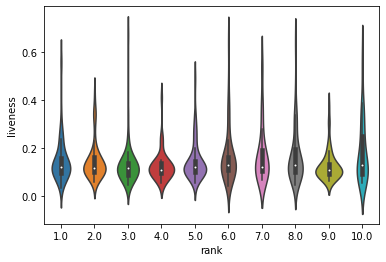

In [49]:
plot(america_df_final, "liveness in Germany","liveness")
sns.violinplot(x= "rank", y = "liveness", data = germany_df_final)

In [ ]:
Liveness measures the presence of a live audience within the song. For both Germany and the US, we can see that people prefer to not hear live audio.

<Looking at the difference in Genres>

/tmp/ipykernel_1728/2221946756.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended = germany_df_final.append(america_df_final)


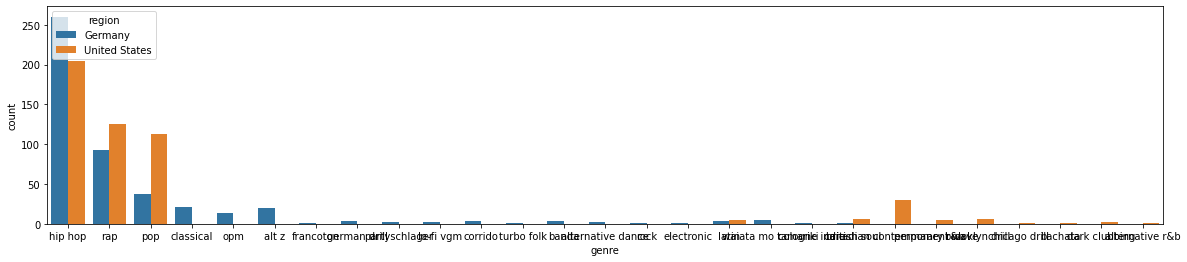

In [53]:
appended = germany_df_final.append(america_df_final)
plt.figure(figsize=(20,4))
ax = sns.countplot(x="genre", hue="region", data=appended)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


In [ ]:
getDistributions(america_df_final, "energy in the USA","energy")
getDistributions(america_df_final, "energy in the USA","loudness")
getDistributions(america_df_final, "energy in the USA","danceability")
getDistributions(america_df_final, "energy in the USA","instrumentalness")
getDistributions(america_df_final, "energy in the USA","speechiness")
getDistributions(german_df_final, "energy in the USA","energy")
getDistributions(german_df_final, "energy in the USA","loudness")
getDistributions(german_df_final, "energy in the USA","danceability")
getDistributions(german_df_final, "energy in the USA","instrumentalness")
getDistributions(german_df_final, "energy in the USA","speechiness")

In [ ]:
def getCorrelation(df):
    df2 = df.copy()
    corr_matrix = df.corr()
    fig,ax = (plt.subplots())
    sns.heatmap(corr_matrix, annot = True, linewidth = .5, ax = ax)

<Creating a Coorelation matrix for each of the attributes for the US and Germany>

In [ ]:
Now, I want to look at how these matricies 

In [ ]:
american_slice = america_df_final[  ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness", "rank2"]]
german_slice = german_df_final[  ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness", "rank2"]]


In [ ]:
getCorrelation(american_slice)

In [ ]:
getCorrelation(german_slice)


In [ ]:
newMatrix = np.corrcoef(american_slice, german_slice)
fig,ax = (plt.subplots())
sns.heatmap(newMatrix, annot = True, linewidth = .5, ax = ax)

In [ ]:
america_df_final

In [ ]:
america_df_final.index

In [ ]:


get_genre(america_df_final)


In [ ]:
america_df_final

In [ ]:
get_genre(german_df_final)

In [ ]:
german_df_final

In [ ]:
check = america_df_final.copy()
check2 = german_df_final.copy()

In [ ]:
america_df_final [np.asarray(america_df_final["genre"]) == False]

In [ ]:
us_genre_df

In [ ]:
us_genre_df

In [ ]:
genreDistribution(german_df_final)

In [ ]:
genreDistribution(america_df_final)

In [ ]:
american_slice2 = america_df_final[  ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness", "rank2", "genre"]]
german_slice2 = german_df_final[  ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness", "rank2", "genre"]]
getCorrelation(american_slice2)
getCorrelation(german_slice2)

In [ ]:
def plot_regression(df, attr):
    fig, ax = plt.subplots(figsize = (10,10))
    if (attr = "energy"):
        sns.regplot(x=df.acousticness,y=df.energy, ax=ax).set_title('Acoustics of a Song Versus the Energy Level',fontsize=15)
        plt.xlabel('Acoustics',fontsize=12);
        plt.ylabel('Energy Level',fontsize=12);                       

In [ ]:
plot_regression(america_df_final)

In [ ]:
lm = linear_model.LinearRegression()
america_mat = np.matrix(america_df_final.drop(america_df_final.columns.difference(["acousticness", "energy"]), 1, inplace = False))
X,Y = america_mat[:,0], america_mat[:,1]
model = lm.fit(np.asarray(X),np.asarray(Y))
m = model.coef_[0]
b = model.intercept_
print("linear Regression: y = {0}x + {1}".format(m, b))
results = sm.ols(formula = " acousticness ~ energy", data = german_df_final).fit()
print(results.summary())

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
sns.regplot(x=german_df_final.speechiness,y=german_df_final.danceability, ax=ax).set_title('Danceablity of Song vs Speechiness',fontsize=15)
plt.xlabel('speechiness',fontsize=12);
plt.ylabel('Danceablity Level',fontsize=12);


In [ ]:
germany_mat = np.matrix(germany_df_final.drop(america_df_final.columns.difference(["speechiness", "danceability"]), 1, inplace = False))
X,Y = germany_mat[:,0], germany_mat[:,1]
model = lm.fit(np.asarray(X),np.asarray(Y))
m = model.coef_[0]
b = model.intercept_
print("linear Regression: y = {0}x + {1}".format(m, b))
results = sm.ols(formula = " speechiness ~ danceability", data = german_df_final).fit()
print(results.summary())

In [ ]:
america_energy = america_df_final["energy"]
america

In [ ]:

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import sklearn.metrics as met
from sklearn import tree
import sklearn.model_selection as ms
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
appended = german_df_final.append(america_df_final)
appended['region_type'] = appended['region'].astype('category')
appended['region_Cat'] = appended['region_type'].cat.codes
appended = shuffle(appended)

ind = appended[  ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness", "rank"]]
         

print(ind)
dep = pd.Categorical.from_codes(np.asarray(appended.region_Cat), np.unique(np.asarray(appended.region_type)))
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(ind, dep, random_state=42)

#appended_porcessed
#dep = pd.Categorical.from_codes(appended["region"])   

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(ind_train, dep_train)
predicted = dt.predict(ind_test)

actual = np.array(dep_test)
predictions = np.array(predicted)
matrix = met.confusion_matrix(actual, predictions)
acc =  (matrix[0][0] + matrix[1][1] ) / sum(list(map(sum, matrix)))                  
print("Accuracy:", acc)

In [ ]:
parameters = {'n_estimators': [25,50,100,125,150,175,200,225,250], 
              'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10], 
              'min_samples_split': [2,3,4,5,6,7]}

ind_train, ind_test, dep_train, dep_test = ms.train_test_split(ind, dep, random_state=42)
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters, cv = 10, scoring='accuracy')

clf.fit(ind_train, dep_train)
print(clf.best_params_)

In [ ]:
dlf=RandomForestClassifier(criterion = clf.best_params_["criterion"],  max_depth = clf.best_params_["max_depth"],
                           min_samples_split = clf.best_params_["min_samples_split"], n_estimators = clf.best_params_["n_estimators"])
dlf.fit(ind_train, dep_train)
predict_ind = clf.predict(ind_test)
matrix = met.confusion_matrix(dep_test, predict_ind)
acc =  (matrix[0][0] + matrix[1][1] ) / sum(list(map(sum, matrix))) 
print("Accuracy:", acc)

In [ ]:

predictRank(df):
    